In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

### Ex 2.5

Case N=5, B=1, K=5

In [47]:
np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5)

array([0, 0, 0, 0, 1])

Expectation of the number of black balls: 1  (N * B/K)

In [2]:
trials = []
for i in range(10000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

0.99199999999999999

Probability distribution of the number of black balls

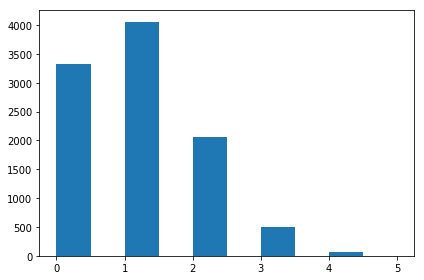

In [3]:
plt.hist(trials)
plt.tight_layout()

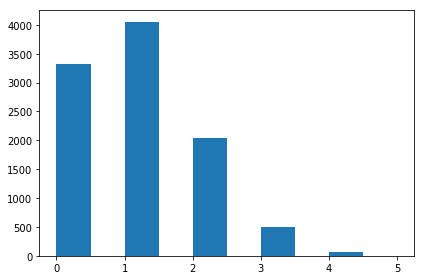

In [4]:
trials_bin = []
for i in range(10000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

Expectation of z

In [5]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [6]:
trials_z = [z(5,1,5) for i in range(10000)]

In [7]:
np.mean(trials_z)

0.99937500000000001

Distribution of z

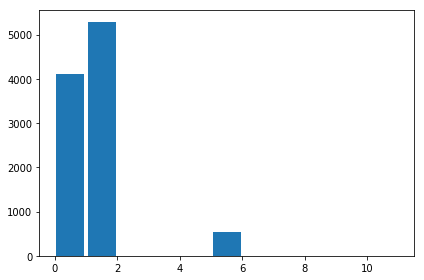

In [16]:
plt.hist(trials_z, bins=range(12), rwidth=0.9)
plt.tight_layout()

Probability of z<1

In [17]:
4000/10000

0.4

### Example 2.6

$P(u | n_B, N) = \frac{P(n_B | u, N) P(u)}{P(n_B | N)}$

Since there are 11 urns,

$P(u) = \frac{1}{11}$

The probability of a black ball is $\frac{u}{10}$ and the binomial coefficient indicates the number of possible combinations of nB back balls.

$P(n_B | u,N) = \binom{N}{n_B}\frac{u}{10}^{n_B}{(1-\frac{u}{10})}^{N-n_B}$

The remaining term is just a summation over all possible urns of the probability of nB and the urn in question.

$P(n_B | N) = \sum_{u}P(n_B,u | N)$

Applying the sum rule,

$\sum_{u}P(n_B,u | N) = \sum_{u}P(u)P(n_B | u,N) = \frac{1}{11}\sum_{u}P(n_B | u,N)$

In [2]:
def prob_nb_given_u_N(nb, u, N):
    return comb(N,nb) * (u/10)**(nb) * (1-u/10)**(N-nb)

In [3]:
def prob_u_given_nb_N(u, nb, N):
    den = 0
    for i in range(11):
        den += prob_nb_given_u_N(nb, i, N)
    
    return prob_nb_given_u_N(nb, u, N) / den

nB = 3, N = 10

In [4]:
for u in range(11):
    print("Urn", u, ":", prob_u_given_nb_N(u, 3, 10))

Urn 0 : 0.0
Urn 1 : 0.0630726246485
Urn 2 : 0.221239787968
Urn 3 : 0.293219859896
Urn 4 : 0.236255574358
Urn 5 : 0.128778505586
Urn 6 : 0.0466677677744
Urn 7 : 0.00989204858457
Urn 8 : 0.000864217921748
Urn 9 : 9.61326393058e-06
Urn 10 : 0.0


In [5]:
probs = [prob_u_given_nb_N(u, 3, 10) for u in range(11)]

<BarContainer object of 11 artists>

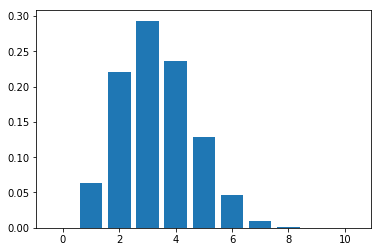

In [6]:
plt.bar(np.arange(0,11), probs)

Given the same case, what is the probability of the next ball being black?

We multiply the probability of drawing a black ball in a particular urn and the probability of the urn itself, then add them, thus considering all possibilities.

$P = \sum_{u=0}^{11}\frac{u}{10} P(nB=3,u | N=10)$

In [11]:
P = 0
for u in range(11):
    P += u/10 * probs[u]
print(P)

0.333037781512


### Exercise 2.7

In the previous exercise, u was a discrete variable $u \in {[0, 1, ... , 10]}$, whereas now $f_H$ is continuous $f_H \in{[0, 1]}$

$P(f_H | n_H, N) = \frac{P(n_H | f_H, N) P(f_H)}{P(n_H | N)}$

$P(f_H) = 1$

$P(n_H | f_H,N) = \binom{N}{n_H}f_H^{n_H}{(1-f_H)}^{N-n_H}$

$P(n_H|N) = \int_{0}^{1}P(n_H, df_H|N) = \int_{0}^{1}df_HP(n_H|df_H, N) = \frac{n_H!(N-n_H)!}{(N + 1)!}$

In [12]:
def factorial(n):
    if (n == 1) or (n == 0):
        return 1
    else:
        return n * factorial(n-1)

In [13]:
def prob_nh_given_fh_N(nh, fh, N):
    return comb(N,nh) * fh**(nh) * (1-fh)**(N-nh)

In [14]:
def prob_nh_given_N(nh, N):
    return factorial(nh) * factorial(N-nh) / factorial(N+1)

In [15]:
def prob_fh_given_nh_N(fh, nh, N):
    return prob_nh_given_fh_N(nh, fh, N) / prob_nh_given_N(nh, N)

a) $N = 3, n_H = 0$

Probability density distribution

In [58]:
probs_fh_a = [prob_fh_given_nh_N(fh, 0, 3) for fh in np.arange(0, 1, 0.01)]

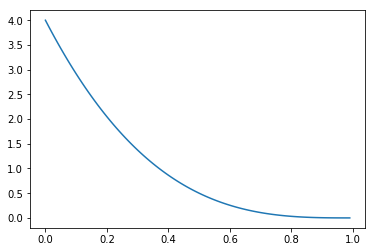

In [59]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_a)

Area under curve is aproximately 1

In [60]:
np.trapz(np.array(probs_fh_a), dx=0.01)

1.0000999800000001

Probability of heads in the next trial

In [66]:
np.sum(np.arange(0, 1, 0.01) * probs_fh_a)

19.9966668

??

b) $N = 3, n_H = 2$

In [67]:
probs_fh_b = [prob_fh_given_nh_N(fh, 2, 3) for fh in np.arange(0, 1, 0.01)]

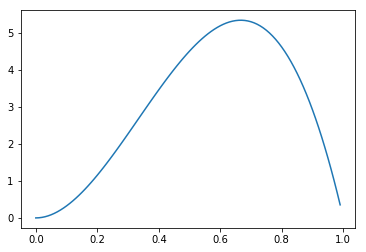

In [63]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_b)

c) $N = 10, n_H = 3$

In [68]:
probs_fh_c = [prob_fh_given_nh_N(fh, 3, 10) for fh in np.arange(0, 1, 0.01)]

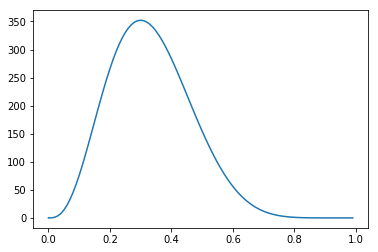

In [69]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_c)

d) $N = 100, n_H = 29$

In [70]:
probs_fh_d = [prob_fh_given_nh_N(fh, 29, 100) for fh in np.arange(0, 1, 0.01)]

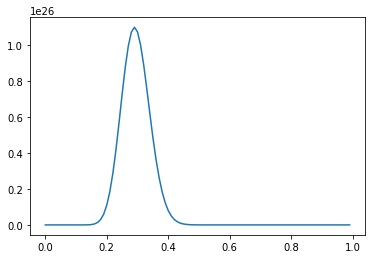

In [71]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_d)

### Exercise 2.14

Prove that if f is a convex function, then $E[f(x)] \geq f(E[x])$, where x is a random variable

Let's try it with the convex function $f(x) = x^2$

In [89]:
Efx = []
fEx = []
for i in range(100):
    x = np.random.choice([-2, 0, 2], p=[0.1, 0.8, 0.1], size=1000)
    Efx.append(np.mean(x**2))
    fEx.append(np.mean(x) ** 2)

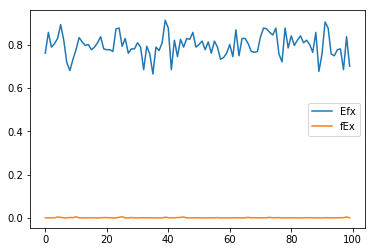

In [93]:
plt.plot(np.arange(100), Efx)
plt.plot(np.arange(100), fEx)
plt.legend(["Efx", "fEx"])

Now a non-convex function $f(x) = x^3$

In [94]:
Efx = []
fEx = []
for i in range(100):
    x = np.random.choice([-2, 0, 2], p=[0.1, 0.8, 0.1], size=1000)
    Efx.append(np.mean(x**3))
    fEx.append(np.mean(x) ** 3)

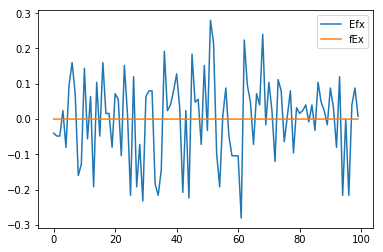

In [95]:
plt.plot(np.arange(100), Efx)
plt.plot(np.arange(100), fEx)
plt.legend(["Efx", "fEx"])